In [1]:
# Import required libraries
from nrc import *
import pandas as pd
import os.path
from os import path
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# define sentiments and emotions
sentiments = ['negative', 'positive']
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']

In [2]:
# get gender words
with open('./data/gender.pkl', 'rb') as f:
        gender_data = pickle.load(f)

# sort out feminine and masculine words from all gender words
feminine_words = [word for (word, gender) in gender_data.items() if gender == 'f']
masculine_words = [word for (word, gender) in gender_data.items() if gender == 'm']

In [14]:
# contain merged dataframes
sentiment_results = pd.DataFrame()
emotion_results = pd.DataFrame()


###### PERIOD 1

# get sentiment for queries throughout the years
data_filename = 'period_2'
years = np.arange(1830, 1930) # start to finish

for year in years:
    # check if year exists
    if not path.isdir(f'./results/{data_filename}/{year}'): 
        print(f'skipping year {year}')
        continue
    
    # read sentiment dataframe
    sentiment = pd.read_csv(f'./results/{data_filename}/{year}/sentiment.csv', index_col=0)
    emotion = pd.read_csv(f'./results/{data_filename}/{year}/emotion.csv', index_col=0)
    
    # ALTERNATIVE - ADD WHOLE DATAFRAME
    sentiment['year'] = year
    emotion['year'] = year
    
    # add to total
    sentiment_results = sentiment_results.append(sentiment)
    emotion_results = emotion_results.append(emotion)
    
    
###### PERIOD 2

# get sentiment for queries throughout the years
data_filename = 'period_modern'
years = np.arange(1931, 2018) # start to finish

for year in years:
    # check if year exists
    if not path.isdir(f'./results/{data_filename}/{year}'): 
        print(f'skipping year {year}')
        continue
    
    # read sentiment dataframe
    sentiment = pd.read_csv(f'./results/{data_filename}/{year}/sentiment.csv', index_col=0)
    emotion = pd.read_csv(f'./results/{data_filename}/{year}/emotion.csv', index_col=0)
    
    # ALTERNATIVE - ADD WHOLE DATAFRAME
    sentiment['year'] = year
    emotion['year'] = year
    
    # add to total
    sentiment_results = sentiment_results.append(sentiment)
    emotion_results = emotion_results.append(emotion)
     
# convert index into column with name "word"
sentiment_results.reset_index(inplace=True)
sentiment_results = sentiment_results.rename(columns = {'index':'word'})

emotion_results.reset_index(inplace=True)
emotion_results = emotion_results.rename(columns = {'index':'word'})

skipping year 1973
skipping year 1989
skipping year 1994
skipping year 2002
skipping year 2015


In [19]:
# add gender column
sentiment_results['gender'] = ['m' if x in masculine_words else 'f' if x in feminine_words else 'n' for x in sentiment_results['word']]
emotion_results['gender'] = ['m' if x in masculine_words else 'f' if x in feminine_words else 'n' for x in emotion_results['word']]


In [20]:
# view first columns
sentiment_results.head()

,word,negative,positive,year,gender
0,gutenberg,0.185291,0.814709,1830,n
1,'s,0.393288,0.606712,1830,n
2,decline,0.494012,0.505988,1830,n
3,science,0.278276,0.721724,1830,n
4,england,0.397493,0.602507,1830,n


In [21]:
# view first columns
emotion_results.head()

,word,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,year,gender
0,gutenberg,0.092199,0.230496,0.048227,0.071631,0.080851,0.123404,0.019149,0.334043,1830,n
1,'s,0.103068,0.151262,0.076251,0.137424,0.127308,0.113136,0.068092,0.223458,1830,n
2,decline,0.100686,0.167048,0.075515,0.148741,0.112128,0.123570,0.070938,0.201373,1830,n
3,science,0.072173,0.198075,0.041700,0.093424,0.153569,0.080994,0.080192,0.279872,1830,n
4,england,0.117520,0.148358,0.081014,0.143357,0.118853,0.109518,0.064011,0.217370,1830,n


In [35]:
gender_results = sentiment_results.loc[(sentiment_results['gender'] == 'm') | (sentiment_results['gender'] == 'f')]

# filter out any words which appear less than 10 times
filter_gender = gender_results.groupby('word').filter(lambda x: len(x) > 100)

# filter out words to not be displayed in graph
filters = ['town', 'dog', 'wolf', 'beard', 'stiff', 'ordinary', 'cow', 'cat', 'bag', 'bull', 'jacob', 
            'roman', 'priest', 'ladies', 'men', 'women', 'gentlemen', 'fellow', 'lord', 'uncle', 'count',
           'page', 'broad', 'mr.', 'mrs.'
          ]
for f in filters:
    filter_gender = filter_gender[filter_gender['word'] != f]
    
# gentleman vs. lady
# sir vs. miss
# men, women
# man, woman
# father, mother
# brother, sister
# king, queen
# husband, wife
# male, female
# son, daughter
# boy, girl
# mr., mrs.
    
#gender_results = gender_results[(gender_results['word'] == 'king') | (gender_results['word'] == 'queen')]

fig = px.line(
        gender_results, x='year', y='positive', color='gender', hover_name='word', 
        range_x=[1830,2018], range_y=[0,1]
      )

fig.add_hline(y=0.5)

fig.show()

In [57]:
gender_emotion_results = emotion_results.loc[(emotion_results['gender'] == 'm') | (emotion_results['gender'] == 'f')]

# filter out any words which appear less than 10 times
e_filter_gender = gender_emotion_results.groupby('word').filter(lambda x: len(x) > 100)

# filter out words
#filters = ['town', 'dog', 'wolf', 'beard', 'stiff', 'ordinary', 'cow', 'cat', 'bag', 'bull', 'jacob']

filters = ['gentleman', 'lady', 'sir', 'miss', 'men', 'women', 'man', 'woman', 'father', 
           'mother', 'brother', 'sister', 'king', 'queen', 'husband', 'wife', 'male', 'female',
          'son', 'daughter', 'boy', 'girl', 'mr.', 'mrs.']

#for f in filters:
#    e_filter_gender = e_filter_gender[e_filter_gender['word'] == f]

# interest: gentleman, sir, men, fellow, man, mr. king, queen, father, wife, mother, 

# gentleman vs. lady
# sir vs. miss
# men, women
# man, woman
# father, mother
# brother, sister
# king, queen
# husband, wife
# male, female
# son, daughter
# boy, girl
# mr., mrs.

# only view two different words
#e_filter_gender = e_filter_gender[(e_filter_gender['word'] == 'father') | (e_filter_gender['word'] == 'mother')]

fig = px.line(
        e_filter_gender, x='year', y='joy', color='gender', hover_name='word', 
        range_x=[1830,2018], range_y=[0,1]
      )

fig.add_hline(y=0.125)

fig.show()

In [58]:
year_vectors = emotion_results.loc[emotion_results['year'] == 1905]

get_most_similar(year_vectors, 'man', 10)

man not in token database,


In [81]:
# gender graph
fig = px.scatter(filter_gender,x="year", y="positive",animation_frame="year", 
                 animation_group="word", color="gender", hover_name="word",
                 range_x=[1830,1920], range_y=[0,1]
                )

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 300 
fig.show()

        word  negative  positive  year gender
2523    tree  0.324022  0.675978  1830      n
14389   tree  0.333333  0.666667  1832      n
16705   tree  0.442308  0.557692  1833      n
22024   tree  0.257732  0.742268  1834      n
25635   tree  0.333333  0.666667  1835      n
...      ...       ...       ...   ...    ...
700709  tree  0.293571  0.706429  1915      n
711227  tree  0.325000  0.675000  1916      n
718131  tree  0.306028  0.693972  1917      n
723851  tree  0.398810  0.601190  1918      n
729336  tree  0.366412  0.633588  1919      n

[89 rows x 5 columns]


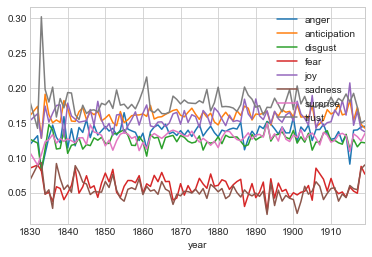

In [105]:
query = 'tree'

s_filtered = sentiment_results[sentiment_results.word.eq(query)]
e_filtered = emotion_results[emotion_results.word.eq(query)]

print(s_filtered)

e_filtered.plot(x='year', y=emotions)

In [81]:
fig = px.line(s_filtered, x='year', y='positive', color='word', range_x=[1840,1920], range_y=[0,1]
             )
fig.show()

In [99]:
# get words which have the most difference 
result = sentiment_results['word'].value_counts()

result = result[result >= 89]

'maid' in result

False

In [101]:
records = []
columns = ['word', '1840', '1919', 'difference']

i = 0
for word in result:
        
    try:
        y1 = float(sentiment_results.query(f'word == "{word}"').query('year == 1840').positive)
        y2 = float(sentiment_results.query(f'word == "{word}"').query('year == 1919').positive)
        records.append([word, y1, y2, abs(y2 - y1)])
    except:
        continue

df = pd.DataFrame(records, columns=columns)
df.head()

,word,1840,1919,difference
0,90,0.785714,0.621429,0.164286
1,90,0.785714,0.621429,0.164286
2,90,0.785714,0.621429,0.164286
3,90,0.785714,0.621429,0.164286
4,90,0.785714,0.621429,0.164286


In [56]:
sentiment_results['size'] = 1

In [57]:
fig = px.scatter(sentiment_results,x="year", y="positive",animation_frame="year", 
                 animation_group="word", color="word", hover_name="word", 
                 range_x=[1830,1980], range_y=[0,1]
                )

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 300 
fig.show()

In [48]:


fig1 = px.line(sentiment_results, x='year', y='positive', color='word', range_x=[1840,1980], range_y=[0,1])
fig2 = px.scatter(sentiment_results, x='year', y='positive', color='word')

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

In [70]:
wheat = sentiment_results.query(f'word == "village"')
prison = sentiment_results.query(f'word == "guard"')

total = wheat.append(prison)

fig = px.line(total, x='year', y='positive', color='word', range_x=[1900,1920], range_y=[0,1])
fig.show()

In [69]:
df.nlargest(10, 'difference')

,word,1900,1920,difference
515,chapter,0.767098,0.387287,0.379811
435,spot,0.843137,0.466667,0.376471
773,bitter,0.695652,0.350000,0.345652
703,replied,0.640884,0.952381,0.311497
718,valley,0.303030,0.600000,0.296970
801,leaving,0.691489,0.401869,0.289620
310,presence,0.751055,0.467742,0.283313
314,village,0.800000,0.523810,0.276190
524,guard,0.862069,0.603175,0.258894
10,hurt,0.290323,0.547619,0.257296
